**Calibración del sensor de Fuerza Vernier Dual-Range Force Sensor**

In [0]:
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit

In [0]:
def pol(x, a, b):
  
  y = a*x + b
  return y

0.000155

In [0]:
Voltaje=np.array([[2.51614, 9.9E-5],
[2.50884, 1.55E-4],
[2.47229, 1.77E-4],
[2.45111, 1.72E-4],
[2.35998, 1.84E-4],
[2.26897, 3.72E-4],
[2.17792, 4.08E-4],
[2.08694, 4.48E-4],
[1.99597, 3.01E-4],
[1.90377, 3.95E-4],
[1.81276, 1.81276E-4],
[1.72385, 4.82E-4],
[1.63284, 4.1E-4],
[1.54211, 4.01E-4],
[1.45128, 5.14E-4],
[1.34184, 4.49E-4],
[2.52225, 1.49E-4],
[2.55849, 1.66E-4],
[2.59512, 1.67E-4],
[2.63173, 1.7E-4],
[2.72251, 2.17E-4]])

In [0]:
po,poo,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10=19.64,177.26,99.33,100.01,100.04,248.17,248.63,248.67,491.43,497.15,497.18,500.53
Masa=-np.array([0,
     po, 
     po+p2,
     poo,
     poo+p4,
     poo+p4+p5,
     poo+p4+p5+p6,
     poo+p8+p9,
     poo+p8+p9+p6,
     poo+p8+p9+p10,
     poo+p8+p9+p10+p6,
     poo+p7+p8+p9+p10,
     poo+p7+p8+p9+p10+p6,
     poo+p7+p8+p9+p10+p6+p4,
     poo+p7+p8+p9+p10+p6+p4+p5,
     poo+p7+p8+p9+p10+p6+p4+p5+p1+p2+p3,
     0,
     -p1,
     -p1-p2,
     -p1-p2-p3,
      -p1-p2-p3-p4])
dM=np.array([np.sqrt(1)*0.03,np.sqrt(1)*0.03,np.sqrt(2)*0.03,np.sqrt(1)*0.03,
             np.sqrt(2)*0.03,np.sqrt(3)*0.03,np.sqrt(4)*0.03,np.sqrt(3)*0.03,
             np.sqrt(4)*0.03,np.sqrt(4)*0.03,np.sqrt(5)*0.03,np.sqrt(5)*0.03,
             np.sqrt(6)*0.03,np.sqrt(7)*0.03,np.sqrt(8)*0.03,np.sqrt(11)*0.03,
             np.sqrt(1)*0.03,np.sqrt(1)*0.03,np.sqrt(2)*0.03,np.sqrt(3)*0.03,
             np.sqrt(4)*0.03])
Fuerza=Masa*9.80754/1000
dF=dM*9.80754/1000

In [57]:
dF

array([0.00029423, 0.00029423, 0.0004161 , 0.00029423, 0.0004161 ,
       0.00050961, 0.00058845, 0.00050961, 0.00058845, 0.00058845,
       0.00065791, 0.00065791, 0.0007207 , 0.00077845, 0.0008322 ,
       0.00097584, 0.00029423, 0.00029423, 0.0004161 , 0.00050961,
       0.00058845])

Text(0, 0.5, 'Fuerza [N]')

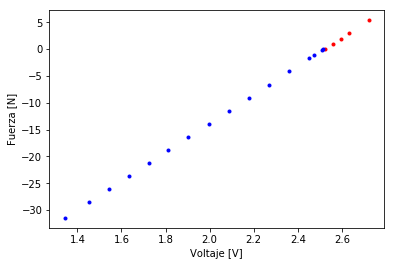

In [78]:
plt.errorbar(Voltaje[:16,0],Fuerza[:16],yerr=dF[:16],fmt='.b')
plt.plot(Voltaje[16:,0],Fuerza[16:],'.r')
plt.xlabel('Voltaje [V]')
plt.ylabel('Fuerza [N]')
#plt.xlim(2.2,2.75)
#plt.ylim(-10,5)

Text(0.5, 0, 'Fuerza [N]')

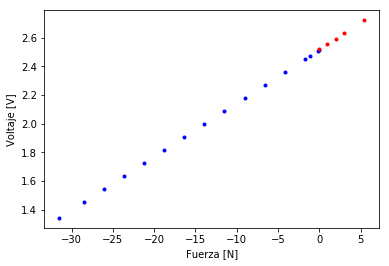

In [77]:
plt.errorbar(Fuerza[:16],Voltaje[:16,0],yerr=Voltaje[:16,1],fmt='.b')
plt.errorbar(Fuerza[16:],Voltaje[16:,0],yerr=Voltaje[16:,1],fmt='.r')
plt.ylabel('Voltaje [V]')
plt.xlabel('Fuerza [N]')
#plt.ylim(2.44,2.49)
#plt.xlim(-4,0)

In [0]:
p_tiro, cov_tiro = curve_fit(pol, Voltaje[:16,0], Fuerza[:16], sigma=dF[:16])
p_empujo, cov_empujo = curve_fit(pol, Voltaje[16:,0], Fuerza[16:], sigma=dF[16:])

p, pcov = curve_fit(pol, Voltaje[:,0], Fuerza[:], sigma=dF[:])

In [64]:
p,pcov

(array([ 26.66526245, -67.16210736]), array([[ 0.00269658, -0.00638078],
        [-0.00638078,  0.01534305]]))

In [61]:
p_tiro, cov_tiro ,p_empujo, cov_empujo

(array([ 26.78885525, -67.40046261]),
 array([[ 1.09356269e-05, -2.47724942e-05],
        [-2.47724942e-05,  5.72333390e-05]]),
 array([ 26.81381386, -67.63007037]),
 array([[ 0.00011061, -0.0002847 ],
        [-0.0002847 ,  0.00073314]]))

In [68]:
5* 26.66526245 -67.16210736

66.16420489000001